<a href="https://colab.research.google.com/github/yanalupu/data-analysis-and-processing-Innopolis-/blob/main/%D0%94%D0%97%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лупу Я.С. ДЗ №3

In [5]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
cwd = os.getcwd()
print(cwd)
sber_data = pd.read_csv('drive/MyDrive/sber_data.csv')
sber_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [6]:
sber_data = pd.read_csv('drive/MyDrive/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [7]:
sber_data['price_doc'].describe()

,price_doc
count,3.047100e+04
mean,7.123035e+06
std,4.780111e+06
min,1.000000e+05
25%,4.740002e+06
50%,6.274411e+06
75%,8.300000e+06
max,1.111111e+08


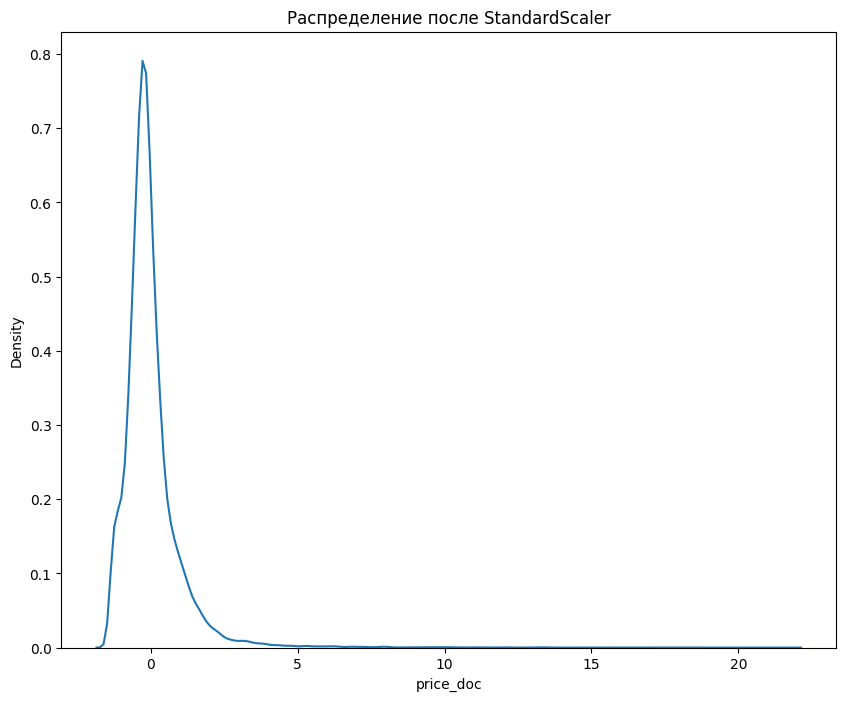

In [8]:
#1.Стандартизируем price_doc

# для нормализации, стандартизации
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# Инициализируем стандартизатор StandardScaler
s_scaler = StandardScaler()

# Стандартизируем признак price_doc
df_s = s_scaler.fit_transform(sber_data[['price_doc']])

# Преобразуем промежуточный датасет в полноценный датафрейм
df_s = pd.DataFrame(df_s, columns=['price_doc'])

# Визуализация распределений после стандартизации
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределение после StandardScaler')

sns.kdeplot(df_s['price_doc'], ax=ax1)
plt.show()

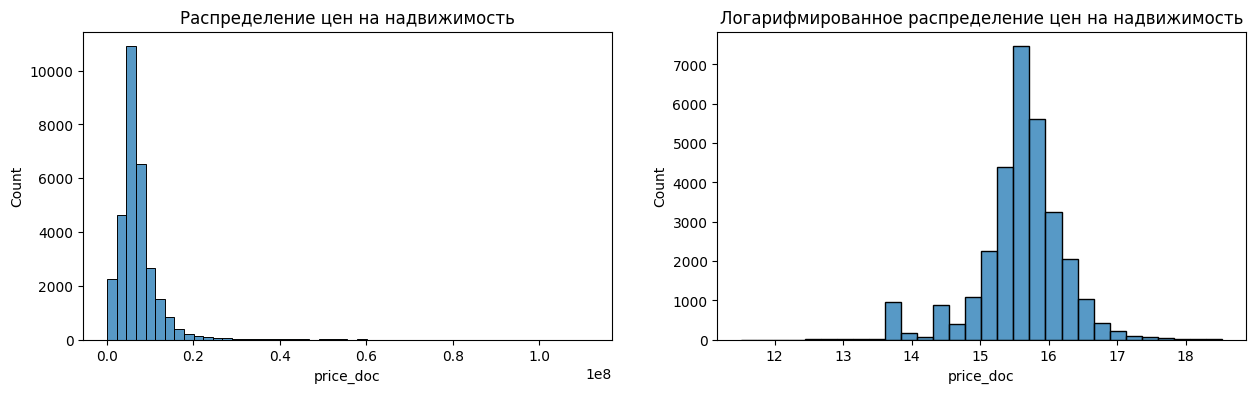

In [9]:
#Визуализируем для полного понимания картины выбросов
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
#гистограмма исходного признака
histplot = sns.histplot(sber_data['price_doc'], bins=50, ax=axes[0])
histplot.set_title('Распределение цен на надвижимость');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Логарифмированное распределение цен на надвижимость');

In [16]:
#2.Теперь применим метод z-отклонения для поиска потенциальных выбросов

def outliers_z_score(data, feature, left = 3, right = 3):
    x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [11]:
outliers, cleaned = outliers_z_score(sber_data,'price_doc')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')


Число выбросов по методу z-отклонения: 461
Результирующее число записей: 30010


In [22]:
#Если сделать послабления на 0.7 сигм в обе стороны, получим:
def outliers_z_score_0_7(data, feature, left = 2.3, right = 3.7):
    x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
    outliers, cleaned = outliers_z_score_0_7(sber_data, 'price_doc')
print(f'Число выбросов по методу z-отклонения,с послаблением: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
#Количество выбросов изменилось

Число выбросов по методу z-отклонения,с послаблением: 146
Результирующее число записей: 30325


In [27]:
#3.Добавим лограифмическое распределение в функцию
def outliers_igr(data, feature, log_scale=False, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_igr(sber_data, 'price_doc', log_scale=True)
print(f'Число выбросов по методу z-отклоненияв лог. распределении и с послаблением на 0.7 в обе стороны: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклоненияв лог. распределении и с послаблением на 0.7 в обе стороны: 146
Результирующее число записей: 30325
